In [1]:
from tensorflow.keras.datasets import mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [56]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Flatten(input_shape=[28,28]),
    Dropout(rate=0.2),
    Dense(100, activation="relu"),
    Dropout(rate=0.2),
    Dense(100, activation="relu"),
    Dropout(rate=0.2),
    Dense(100, activation="relu"),
    Dropout(rate=0.2),
    Dense(10, activation="softmax")
])

In [71]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=SGD(lr=2e-1),
              metrics=["accuracy"])

In [72]:
early_stopping_cb = EarlyStopping(patience=20)
checkpoint_cb = ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7080 - accuracy: 0.7689 - val_loss: 0.1715 - val_accuracy: 0.9490
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2676 - accuracy: 0.9218 - val_loss: 0.1233 - val_accuracy: 0.9636
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2182 - accuracy: 0.9375 - val_loss: 0.1193 - val_accuracy: 0.9668
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2004 - accuracy: 0.9402 - val_loss: 0.1014 - val_accuracy: 0.9706
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1827 - accuracy: 0.9450 - val_loss: 0.1042 - val_accuracy: 0.9694
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1686 - accuracy: 0.9486 - val_loss: 0.1057 - val_accuracy: 0.9708
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1517 - accuracy: 0.9558 - val_loss: 0.0962 - val_ac

1719/1719 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0697 - val_accuracy: 0.9818
Epoch 58/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9739 - val_loss: 0.0733 - val_accuracy: 0.9796
Epoch 59/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9725 - val_loss: 0.0724 - val_accuracy: 0.9794
Epoch 60/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0792 - accuracy: 0.9761 - val_loss: 0.0747 - val_accuracy: 0.9798
Epoch 61/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0880 - accuracy: 0.9734 - val_loss: 0.0711 - val_accuracy: 0.9802
Epoch 62/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9736 - val_loss: 0.0731 - val_accuracy: 0.9806
Epoch 63/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0843 - accuracy: 0.9744 - val_loss: 0.0722 - val_accuracy

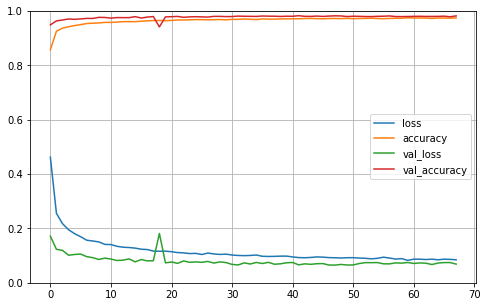

In [73]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [75]:
from tensorflow import keras
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 938us/step - loss: 11.0737 - accuracy: 0.9717


[11.073723793029785, 0.9717000126838684]